# Exploratory Data Analysis(EDA) of Titanic dataset

For this lecture we will be working with the Titanic Data Set from Kaggle. This is a very famous data set and very often is a student's first step in machine learning!

We'll be trying to predict a classification- survival or deceased. Let's begin our understanding of implementing Logistic Regression in Python for classification.

# Import Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# The Data
Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [34]:
import pandas as pd
import requests

#How to read GitHub csv files directly into Python

url = 'https://raw.githubusercontent.com/krishnaik06/EDA1/master/titanic_train.csv'
res = requests.get(url, allow_redirects=True)
with open('titanic_train.csv','wb') as file:
    file.write(res.content)
train = pd.read_csv('titanic_train.csv')
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!

# Missing Data
We can use seaborn to create a simple heatmap to see where we are missing data!

In [35]:
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

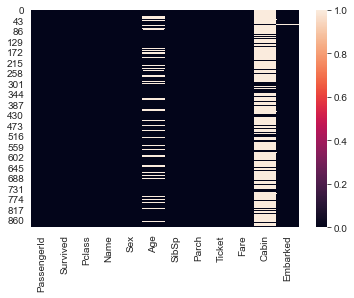

In [36]:
sns.heatmap(train.isnull())

<AxesSubplot:>

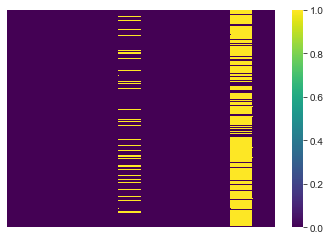

In [37]:
sns.heatmap(train.isnull(),xticklabels=False,yticklabels=False,cmap='viridis')


Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference

<AxesSubplot:xlabel='Survived', ylabel='count'>

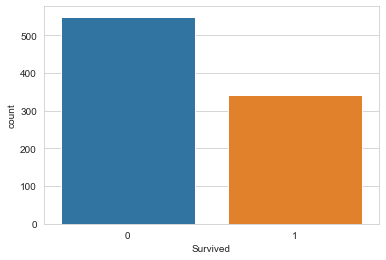

In [38]:
sns.set_style('whitegrid')
sns.countplot(x="Survived",data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

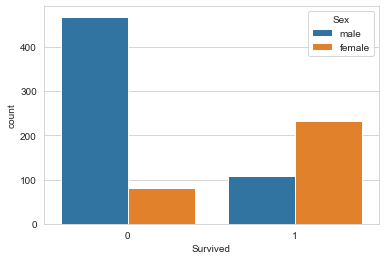

In [39]:
sns.countplot(x="Survived",hue="Sex",data=train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

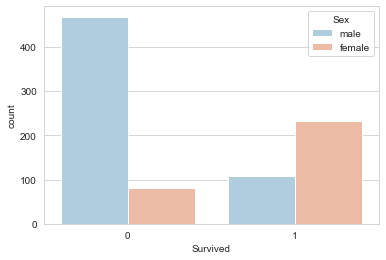

In [40]:
sns.countplot(x="Survived",hue="Sex",data=train,palette='RdBu_r')

<AxesSubplot:xlabel='Survived', ylabel='count'>

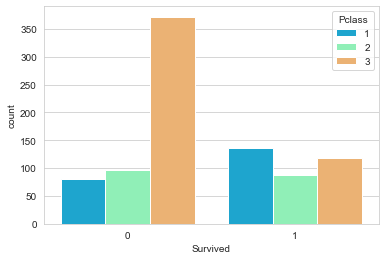

In [41]:
 sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

C:\Users\PIYUSH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

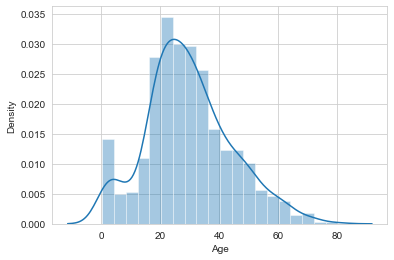

In [42]:
sns.distplot(train['Age'].dropna())

C:\Users\PIYUSH\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

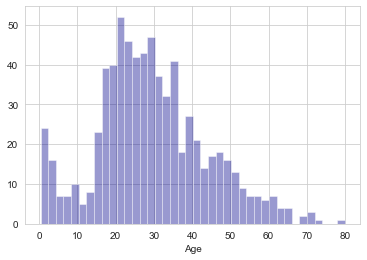

In [43]:
sns.distplot(train['Age'].dropna(),kde=False,color="Darkblue",bins=40)

<AxesSubplot:>

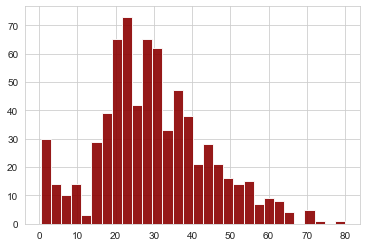

In [44]:
train['Age'].hist(bins=30,color='darkred',alpha=0.9)


<AxesSubplot:xlabel='SibSp', ylabel='count'>

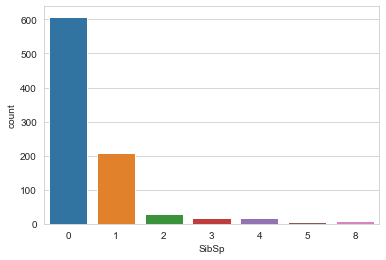

In [45]:
sns.countplot(x='SibSp',data=train)

<AxesSubplot:>

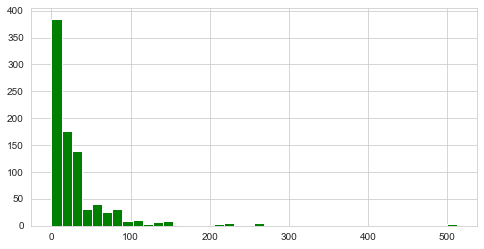

In [86]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

#train["Fare"].hist(color='red')

# Cufflinks for plots
Let's take a quick moment to show an example of cufflinks!

# Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the average age by passenger class. For example:

In [87]:
import cufflinks as cf
cf.go_offline()

ModuleNotFoundError: No module named 'cufflinks'

In [ ]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

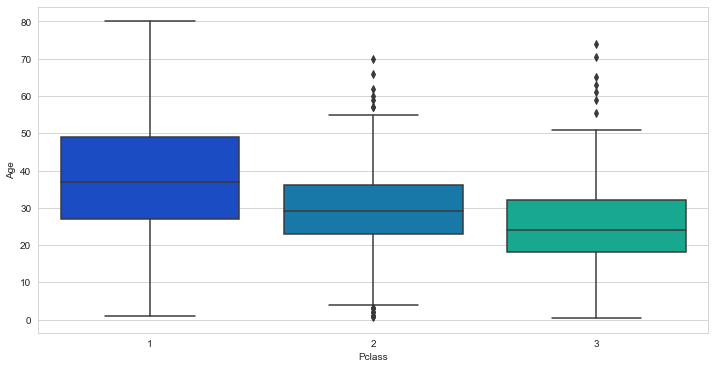

In [47]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [48]:
def input_age (lis):
    Age= lis[0]
    Pclass=lis[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass ==2:
            return 29
        else:
            return 24
    else:
        return Age        

In [50]:
#applying above fun anf fill the age

train['Age']=train[['Age','Pclass']].apply(input_age,axis=1)


In [52]:
#Now let's check that heat map again!
sns.heatmap(train.isnull(),cmap='viridis')

<AxesSubplot:>

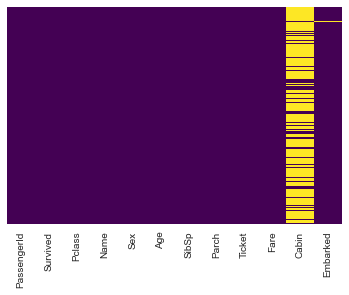

In [51]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [53]:
train.drop('Cabin',axis=1,inplace=True)

In [54]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<AxesSubplot:>

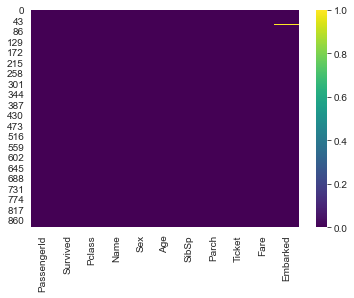

In [55]:
sns.heatmap(train.isnull(),cmap='viridis')

<AxesSubplot:>

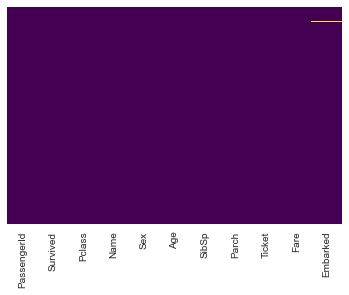

In [56]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


# Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [62]:
pd.get_dummies(train['Embarked'],drop_first=False).head() #by default

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [61]:
pd.get_dummies(train['Embarked'],drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [63]:
sex= pd.get_dummies(train['Sex'],drop_first=True)
embrak=pd.get_dummies(train['Embarked'],drop_first=True)

In [66]:
train.drop(['Embarked','Sex','Name','Ticket'],axis=1,inplace=True)

In [67]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,24.0,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


Great! Our data is ready for our model!

# Building a Logistic Regression model
Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

#Train Test Split

In [68]:
train.drop('Survived',axis=1).head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500


In [69]:
from sklearn.model_selection import train_test_split

In [70]:
X_train,X_test,y_train,y_test = train_test_split(train.drop('Survived',axis=1),
train['Survived'],test_size=0.30,random_state=101)

# Training and Predicting

In [71]:
from sklearn.linear_model import LogisticRegression

In [72]:
logmodel= LogisticRegression()

In [73]:
logmodel.fit(X_train,y_train)

LogisticRegression()

In [76]:
predictions = logmodel.predict(X_test)

In [77]:
from sklearn.metrics import confusion_matrix

In [80]:
accuracy= confusion_matrix(y_test,predictions)
accuracy

array([[133,  21],
       [ 60,  54]], dtype=int64)

In [81]:
from sklearn.metrics import accuracy_score

In [83]:
acc=accuracy_score(y_test,predictions)
acc

0.6977611940298507

In [85]:
predictions

array([1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0], dtype=int64)

# Evaluation

We can check precision,recall,f1-score using classification report!

In [88]:
from sklearn.metrics import classification_report


In [89]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.69      0.86      0.77       154
           1       0.72      0.47      0.57       114

    accuracy                           0.70       268
   macro avg       0.70      0.67      0.67       268
weighted avg       0.70      0.70      0.68       268

